In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
dataset=pd.read_csv('insurance.csv')

In [164]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [165]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

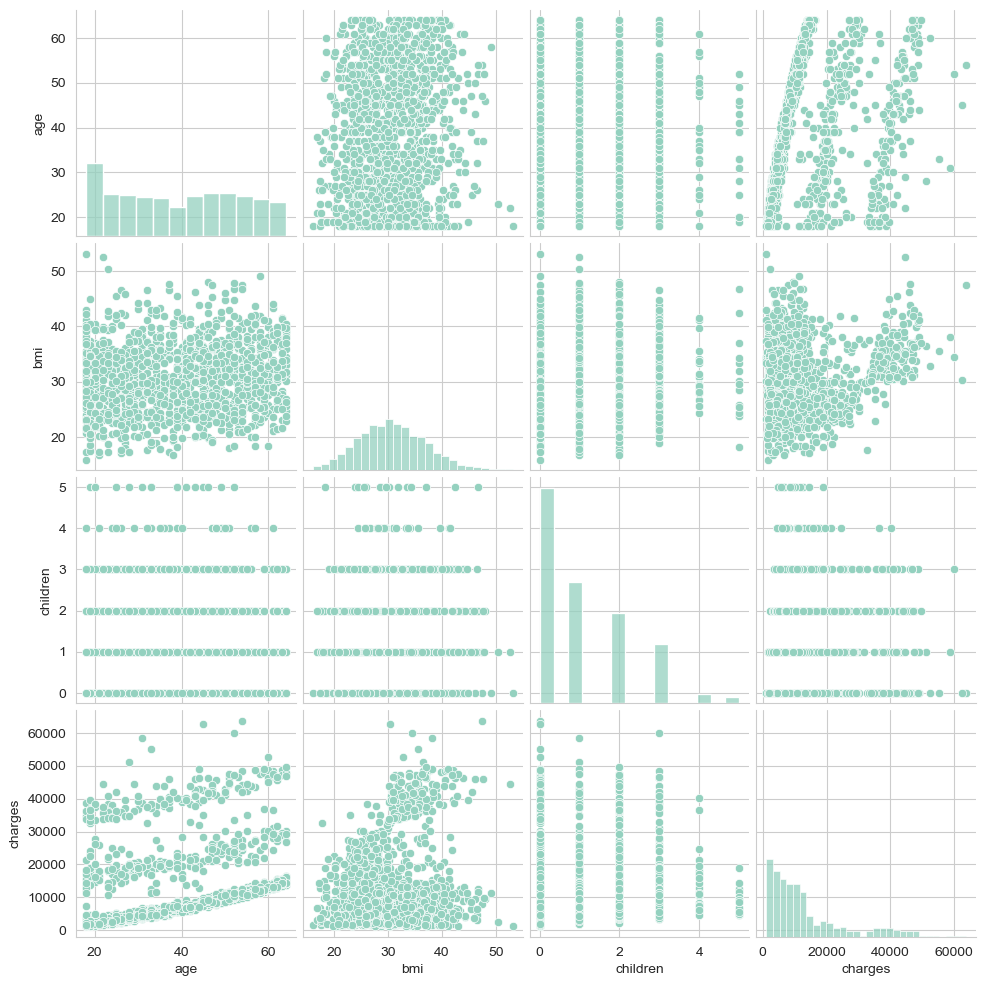

In [166]:
sns.pairplot(dataset)

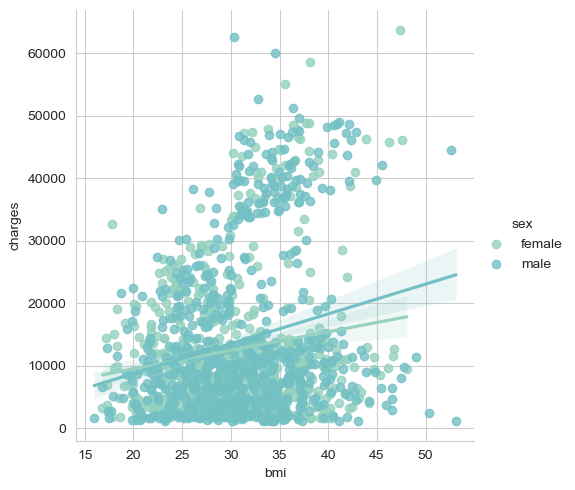

In [167]:
sns.lmplot(x='bmi',y='charges',hue='sex',data=dataset)

In [168]:
from category_encoders import *

In [169]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [170]:
x

array([[19, 'female', 27.9, 0, 'yes', 'southwest'],
       [18, 'male', 33.77, 1, 'no', 'southeast'],
       [28, 'male', 33.0, 3, 'no', 'southeast'],
       ...,
       [18, 'female', 36.85, 0, 'no', 'southeast'],
       [21, 'female', 25.8, 0, 'no', 'southwest'],
       [61, 'female', 29.07, 0, 'yes', 'northwest']], dtype=object)

In [171]:
y

array([16884.92,  1725.55,  4449.46, ...,  1629.83,  2007.94, 29141.36])

In [172]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [173]:
lb= BinaryEncoder(cols=[1,4,5]).fit(x)
x= lb.transform(x)
x=np.array(x)

In [174]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 101)

In [175]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [176]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
eva= np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
eva1=eva.astype(int)
print(eva1)

[[11107  6079]
 [ 3213  2457]
 [10419 25517]
 ...
 [ 9581  6653]
 [ 9574  8116]
 [ 5824  7147]]


In [177]:
from sklearn import metrics
print('R2 Score:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 Score: 0.7663856103151849
MAE: 3922.9908563112076
MSE: 31699995.632930357
RMSE: 5630.274916283428


C:\Users\ssw10\AppData\Local\Temp\ipykernel_22892\3531855361.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_pred));


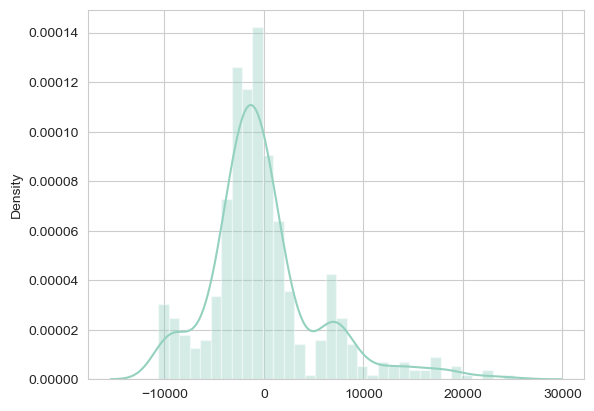

In [178]:
sns.distplot((y_test-y_pred));

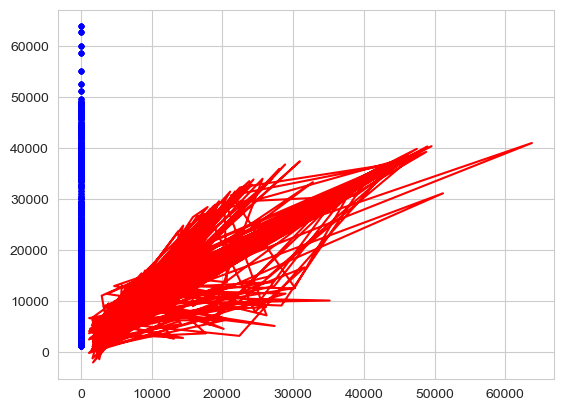

In [179]:
plt.plot(y_test,y_pred,"r-")
plt.plot(x, y, "b.")

In [180]:
regressor.coef_

array([   233.24,     31.86,    -31.86,    381.31,    480.24, -11797.63,
        11797.63,   1937.05,   1033.67,    893.24])

In [181]:
regressor.intercept_

-2535.0219149713394

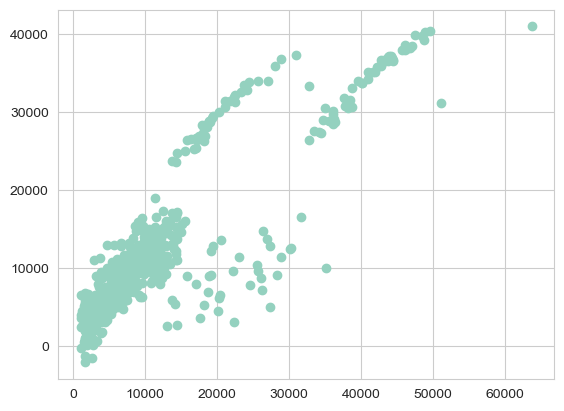

In [182]:
plt.scatter(y_test,y_pred)